### Train YOLOv8 On Custom Dataset
The Hard Hat dataset is an object detection dataset of workers in construction sites that require a hard hat. 
Annotations also include examples of just "person" and "head," for when an individual may be present without a hard hart.

In [1]:
#use pip to install ultralytics and roboflow to extract the dataset
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 56.1 MB/s eta 0:00:00


In [2]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 44.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 115.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.9/738.9 kB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 86.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1
  Attempting uninst

In [ ]:
#Import necessary Libraries
from PIL import Image
import cv2
from roboflow import Roboflow
from ultralytics import YOLO
from PIL import Image


In [3]:
#export dataset
rf = Roboflow(api_key="ObZiCCFfi6a0GjBMxXZi")
project = rf.workspace("shaoni-mukherjee-umnyu").project("hard-hat-sample-ps3xv")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.205, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Hard-Hat-Sample-2 in yolov8:: 100%|██████████| 491/491 [00:00<00:00, 5738.93it/s]


In [9]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="Hard-Hat-Sample-2/data.yaml", epochs=20)  # train the model
results = model.val()  # evaluate model performance on the validation set


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /notebooks/Hard-Hat-Sample-2/train/labels.cache... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<?, ?it/s]
val: Scanning /notebooks/Hard-Hat-Sample-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/20      2.51G      2.147   

Ultralytics YOLOv8.0.205 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A6000, 48677MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /notebooks/Hard-Hat-Sample-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]
                   all         20         65      0.649      0.789      0.818      0.498
                  head         20         18      0.449          1      0.926      0.625
                helmet         20         45      0.717      0.867      0.908      0.517
                person         20          2      0.783        0.5       0.62      0.351
Speed: 3.2ms preprocess, 1.7ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train42


In [5]:
#model = YOLO('yolov8n.pt') 

In [13]:
# from PIL
#im1 = Image.open("quick_start_pytorch_images/download.jpeg")
# Predict with the model
results = model('https://safetyculture.com/wp-content/media/2022/02/Construction.jpeg')

  0%|          | 0.00/338k [00:00<?, ?B/s]

image 1/1 /notebooks/Construction.jpeg: 448x640 2 helmets, 6.2ms
Speed: 18.0ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


In [14]:
# View results
for r in results:
    print(r.boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 1.], device='cuda:0')
conf: tensor([0.8637, 0.3764], device='cuda:0')
data: tensor([[1.1509e+03, 4.8964e+02, 1.2508e+03, 6.0576e+02, 8.6367e-01, 1.0000e+00],
        [1.0266e+03, 5.4731e+02, 1.0924e+03, 6.4420e+02, 3.7637e-01, 1.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1200, 1800)
shape: torch.Size([2, 6])
xywh: tensor([[1200.8381,  547.7045,   99.8293,  116.1193],
        [1059.4952,  595.7579,   65.8059,   96.8862]], device='cuda:0')
xywhn: tensor([[0.6671, 0.4564, 0.0555, 0.0968],
        [0.5886, 0.4965, 0.0366, 0.0807]], device='cuda:0')
xyxy: tensor([[1150.9235,  489.6448, 1250.7528,  605.7641],
        [1026.5923,  547.3148, 1092.3982,  644.2010]], device='cuda:0')
xyxyn: tensor([[0.6394, 0.4080, 0.6949, 0.5048],
        [0.5703, 0.4561, 0.6069, 0.5368]], device='cuda:0')


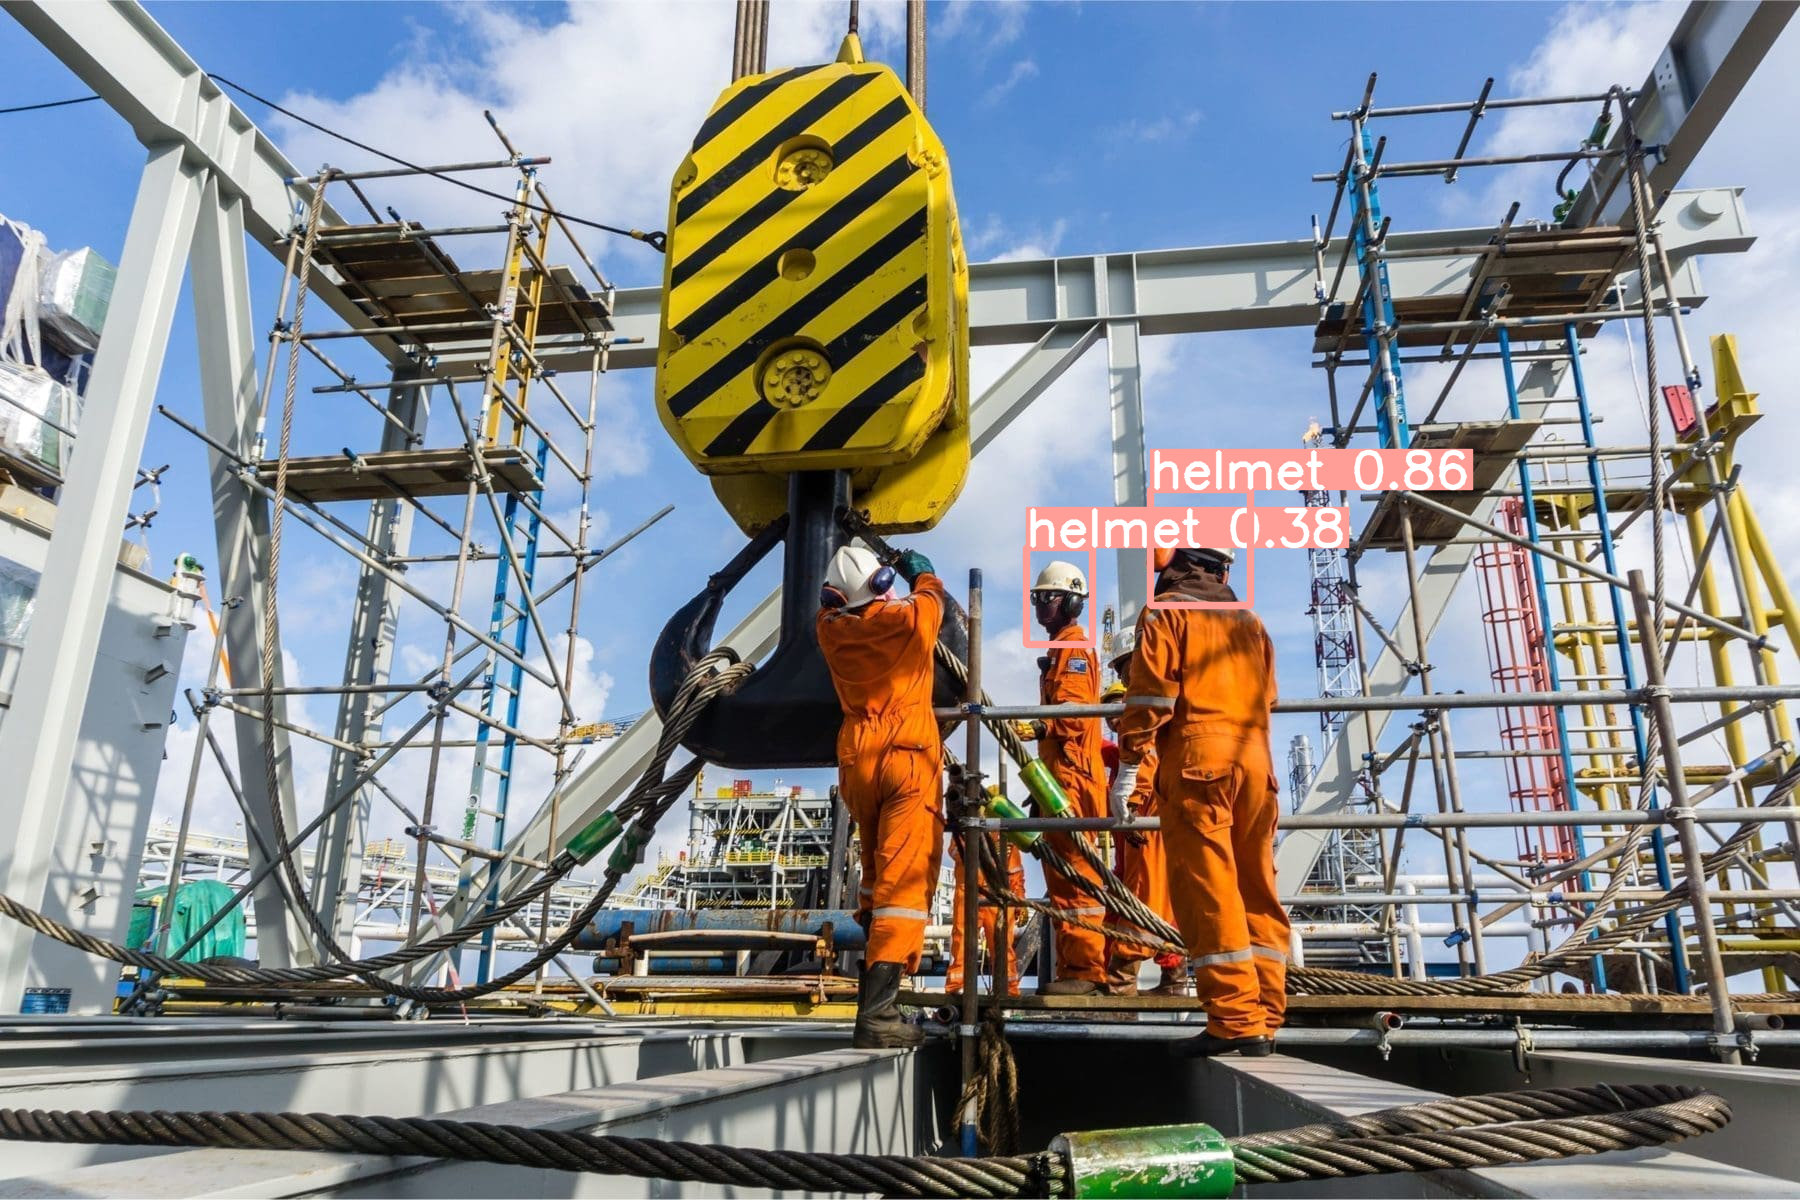

In [15]:
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg') 